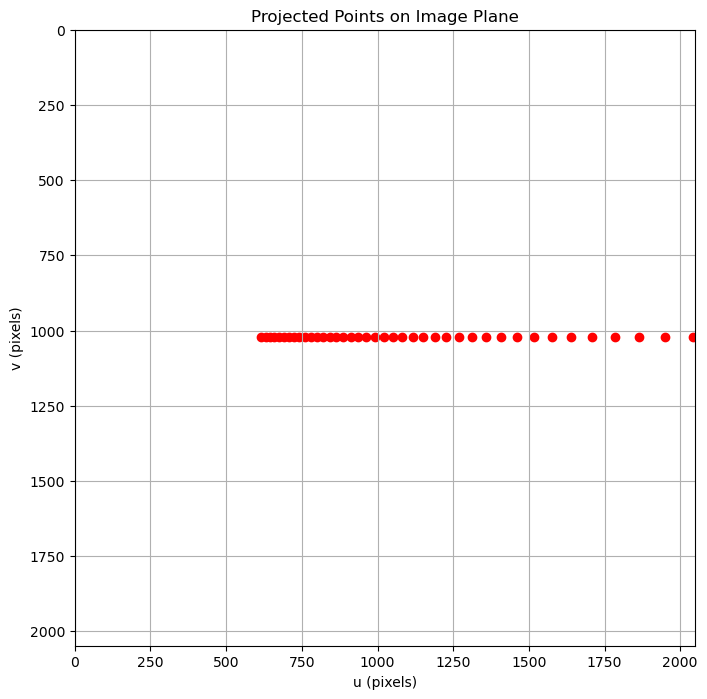

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Intrinsic camera parameters
fx = 1260  # Focal length in x (pixels)
fy = 1260  # Focal length in y (pixels)
u0 = 1020  # Principal point x-coordinate (pixels)
v0 = 1020  # Principal point y-coordinate (pixels)

# Image resolution
img_width = 2048  # Image width (pixels)
img_height = 2048  # Image height (pixels)

# Pattern parameters
num_points = 41        # Number of points
point_distance = 60    # Distance between points (mm)
total_length = point_distance * (num_points - 1)  # Total length of the point array (mm)

# Generate 3D points along a straight line in the pattern coordinate system
x_pattern = np.linspace(-total_length/2, total_length/2, num_points)
y_pattern = np.zeros(num_points)
z_pattern = np.zeros(num_points)
points_pattern = np.vstack((x_pattern, y_pattern, z_pattern))  # Shape: (3, num_points)

# Rotation angles (in degrees)
rx_deg = 0    # Rotation around x-axis
ry_deg = 45   # Rotation around y-axis
rz_deg = 0    # Rotation around z-axis

# Convert rotation angles to radians
rx_rad = np.deg2rad(rx_deg)
ry_rad = np.deg2rad(ry_deg)
rz_rad = np.deg2rad(rz_deg)

# Rotation matrices
Rx = np.array([[1, 0, 0],
               [0, np.cos(rx_rad), -np.sin(rx_rad)],
               [0, np.sin(rx_rad), np.cos(rx_rad)]])

Ry = np.array([[np.cos(ry_rad), 0, np.sin(ry_rad)],
               [0, 1, 0],
               [-np.sin(ry_rad), 0, np.cos(ry_rad)]])

Rz = np.array([[np.cos(rz_rad), -np.sin(rz_rad), 0],
               [np.sin(rz_rad), np.cos(rz_rad), 0],
               [0, 0, 1]])

# Combined rotation matrix
R = Rz @ Ry @ Rx  # Matrix multiplication

# Translation vector (mm)
t = np.array([[0],
              [0],
              [1800]])  # The pattern is 3 meters in front of the camera

# Transform points to the camera coordinate system
points_camera = R @ points_pattern + t  # Shape: (3, num_points)

# Extract X, Y, Z coordinates
X_cam = points_camera[0, :]
Y_cam = points_camera[1, :]
Z_cam = points_camera[2, :]

# Perspective projection (normalized image coordinates)
x_norm = X_cam / Z_cam
y_norm = Y_cam / Z_cam

# Apply camera intrinsic parameters to get pixel coordinates
u = fx * x_norm + u0
v = fy * y_norm + v0

# Filter points that are within the image frame
valid_indices = (u >= 0) & (u <= img_width) & (v >= 0) & (v <= img_height)
u_valid = u[valid_indices]
v_valid = v[valid_indices]

# Plot the projected points on the image plane
plt.figure(figsize=(8, 8))
plt.scatter(u_valid, v_valid, color='red', marker='o')
plt.xlim(0, img_width)
plt.ylim(img_height, 0)  # In image coordinates, the origin is at the top-left corner
plt.title('Projected Points on Image Plane')
plt.xlabel('u (pixels)')
plt.ylabel('v (pixels)')
plt.grid(True)
plt.show()


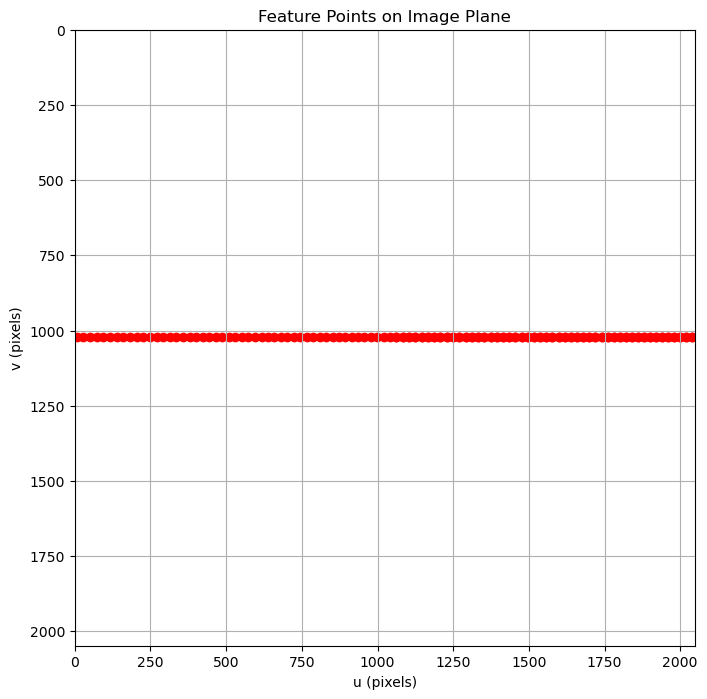

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define pattern parameters
N = 58          # Number of vertical lines (Pi)
h = 50          # Distance between vertical lines (mm)
l = 50          # Parameter for slanted lines (mm)

# Generate vertical lines Pi: X = i * h
i_P = np.arange(1, N + 1)
X_P = i_P * h

# Generate slanted lines Di: Y = (l/h)*X - (i - 1)*l
i_D = np.arange(1, N)
def Di(i, X):
    return (l / h) * X - (i - 1) * l

# Camera intrinsic parameters
fx = 1260  # Focal length in x (pixels)
fy = 1260  # Focal length in y (pixels)
u0 = 1020  # Principal point x-coordinate (pixels)
v0 = 1020  # Principal point y-coordinate (pixels)

# Image resolution
img_width = 2048  # Image width (pixels)
img_height = 2048  # Image height (pixels)

# Rotation angles (degrees)
rx_deg = 5    # Rotation around x-axis
ry_deg = -2   # Rotation around y-axis
rz_deg = 0    # Rotation around z-axis

# Convert rotation angles to radians
rx_rad = np.deg2rad(rx_deg)
ry_rad = np.deg2rad(ry_deg)
rz_rad = np.deg2rad(rz_deg)

# Rotation matrices
Rx = np.array([[1, 0, 0],
               [0, np.cos(rx_rad), -np.sin(rx_rad)],
               [0, np.sin(rx_rad), np.cos(rx_rad)]])

Ry = np.array([[np.cos(ry_rad), 0, np.sin(ry_rad)],
               [0, 1, 0],
               [-np.sin(ry_rad), 0, np.cos(ry_rad)]])

Rz = np.array([[np.cos(rz_rad), -np.sin(rz_rad), 0],
               [np.sin(rz_rad), np.cos(rz_rad), 0],
               [0, 0, 1]])

# Combined rotation matrix
R = Rz @ Ry @ Rx  # Combined rotation matrix

# Translation vector
t = np.array([[0],
              [0],
              [3000]])  # 3 meters in front of the camera

# Function to compute the feature points
def compute_feature_points():
    feature_points_world = []
    feature_points_image = []

    # For each pair of vertical and slanted lines
    for i in range(1, N):
        # Vertical lines
        X_Pi = i * h
        X_Pi1 = (i + 1) * h

        # Slanted line Di between Pi and Pi+1
        # Find intersection of view line with Pi, Pi+1, and Di

        # Define lines in the pattern coordinate system
        # Vertical lines Pi: X = constant
        # Slanted line Di: Y = (l/h)*X - (i - 1)*l

        # We need to find the intersection of the view line with these lines

        # For simplification, assume the view line lies along Y = Y0 on the pattern plane Z=0
        # Since we have rotations, the view line will be affected by camera orientation
        # Let's compute the view line equation in the pattern coordinate system

        # Compute the view line direction vector in the pattern coordinate system
        # This is the projection of the camera's viewing direction onto the pattern plane

        # Camera viewing direction in camera coordinate system is along Z-axis
        viewing_direction_cam = np.array([0, 0, 1])

        # Transform viewing direction to pattern coordinate system
        viewing_direction_world = R.T @ viewing_direction_cam

        # Since the pattern plane is at Z=0, we can find the intersection points

        # For simplicity, let's assume the view line intersects at Y = Y0
        # We'll choose Y0 = 0 for simplicity
        Y0 = 0

        # Compute intersection points with vertical lines Pi and Pi+1
        # Since vertical lines are at X = X_Pi and X = X_Pi1, and the view line is at Y = Y0
        # So the intersection points are at (X_Pi, Y0, 0) and (X_Pi1, Y0, 0)

        # For the slanted line Di: Y = (l/h)*X - (i - 1)*l
        # Substitute Y = Y0, solve for X
        A = (l / h)
        B = -(i - 1) * l - Y0
        X_Di = B / A

        # Intersection point with Di is at (X_Di, Y0, 0)

        # Collect the points
        points_world = np.array([
            [X_Pi, Y0, 0],      # Point A (on Pi)
            [X_Di, Y0, 0],      # Point B (on Di)
            [X_Pi1, Y0, 0]      # Point C (on Pi+1)
        ])

        # Transform points to camera coordinate system
        points_cam = R @ points_world.T + t  # Shape: (3, num_points)

        # Perspective projection
        X_cam = points_cam[0, :]
        Y_cam = points_cam[1, :]
        Z_cam = points_cam[2, :]

        x_norm = X_cam / Z_cam
        y_norm = Y_cam / Z_cam

        # Apply camera intrinsic parameters to get pixel coordinates
        u = fx * x_norm + u0
        v = fy * y_norm + v0

        # Since it's a line-scan camera, we only consider u
        # However, for the purpose of calibration, we'll assume v = v0

        # Store the feature points
        feature_points_world.append(points_world)
        feature_points_image.append(np.vstack((u, v)))

    # Convert lists to arrays
    feature_points_world = np.hstack(feature_points_world)
    feature_points_image = np.hstack(feature_points_image)

    return feature_points_world, feature_points_image

# Compute feature points
feature_points_world, feature_points_image = compute_feature_points()

# Plot the feature points on the image plane
plt.figure(figsize=(8, 8))
plt.scatter(feature_points_image[0, :], feature_points_image[1, :], color='red', marker='o')
plt.xlim(0, img_width)
plt.ylim(img_height, 0)  # In image coordinates, the origin is at the top-left corner
plt.title('Feature Points on Image Plane')
plt.xlabel('u (pixels)')
plt.ylabel('v (pixels)')
plt.grid(True)
plt.show()
